In [1]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import matplotlib as plt 
from pylab import figure, show, legend, ylabel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy.stats as stats
from datetime import datetime
import scipy 
import math 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as mplt

In [2]:
#LEER ARCHIVO Y DAR NOMBRE A COLUMNAS
df = pd.read_csv("bermuda.csv", names=['Fecha', 'WaterLevel', 'Sigma','O','F','R','L','Quality'],skiprows=[0])

#Mostrar cálculos estadisticos de los datos. 
df.describe()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,WaterLevel,Sigma,O,F,R,L,Quality
count,2160.000000,2160.000000,2160.000000,2160.0,0.0,0.0,0.0
mean,0.422575,0.037181,0.007870,0.0,NaN,NaN,NaN
std,0.297827,0.032130,0.088386,0.0,NaN,NaN,NaN
min,-0.215000,0.000000,0.000000,0.0,NaN,NaN,NaN
25%,0.178000,0.017000,0.000000,0.0,NaN,NaN,NaN
50%,0.421500,0.025000,0.000000,0.0,NaN,NaN,NaN
75%,0.676250,0.045000,0.000000,0.0,NaN,NaN,NaN
max,1.093000,0.230000,1.000000,0.0,NaN,NaN,NaN


In [3]:
#QUITAR COLUMNAS INNECESARIAS DEL ARCHIVO HONOLULU_HOUR.CSV
df_short=df.drop(df.columns[[2,3,4,5,6,7]],axis=1)

#IDENTIFICAR LA FECHA POR MES(Enero=1, Febrero=2,..., Diciembre=12)
df_short['month']=pd.DatetimeIndex(df_short['Fecha']).month

#DATOS_ENERO (Enero=1) (Del dato=0 hasta dato=743)
df_enero=df_short.loc[df_short[u'month'] == 1]
df_enero


,Fecha,WaterLevel,month
0,2017-01-01 00:00,0.544,1
1,2017-01-01 01:00,0.689,1
2,2017-01-01 02:00,0.739,1
3,2017-01-01 03:00,0.698,1
4,2017-01-01 04:00,0.594,1
5,2017-01-01 05:00,0.399,1
6,2017-01-01 06:00,0.222,1
7,2017-01-01 07:00,0.099,1
8,2017-01-01 08:00,0.058,1
9,2017-01-01 09:00,0.131,1


In [4]:
#DATOS_FEBRERO (Febrero=2) (Del dato=744 hasta dato=1415)
df_febrero=df_short.loc[df_short[u'month'] == 2]
df_febrero

,Fecha,WaterLevel,month
744,2017-02-01 00:00,0.344,2
745,2017-02-01 01:00,0.573,2
746,2017-02-01 02:00,0.728,2
747,2017-02-01 03:00,0.787,2
748,2017-02-01 04:00,0.735,2
749,2017-02-01 05:00,0.589,2
750,2017-02-01 06:00,0.393,2
751,2017-02-01 07:00,0.176,2
752,2017-02-01 08:00,0.028,2
753,2017-02-01 09:00,-0.049,2


In [5]:
#UNIR DATOS: ENERO_FEBRERO
df_meses=[df_enero,df_febrero]
df_union=pd.concat(df_meses)

#MOSTRAR TABLA DE DATOS UNIDOS
df_union.head()



,Fecha,WaterLevel,month
0,2017-01-01 00:00,0.544,1
1,2017-01-01 01:00,0.689,1
2,2017-01-01 02:00,0.739,1
3,2017-01-01 03:00,0.698,1
4,2017-01-01 04:00,0.594,1


In [6]:
#LOCALIZAR MESES
df_enero=df_short.loc[df_short[u'month'] == 1]
df_febrero=df_short.loc[df_short[u'month'] == 2]

In [7]:
#TRABAJEMOS CON ENERO

#Seleccionar intervalo de tiempo.
time_range = pd.date_range('2017-01-01 00:00:00','2017-01-31 23:00:00', freq='H')

#Crear serie de tiempo para enero (en horas)
hours = time_range.hour
days = time_range.day
enero_day = (days-1)*24+hours
enero_day

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [8]:
#TRABAJEMOS CON FEBRERO

#Seleccionar intervalo de tiempo.
time_range = pd.date_range('2017-02-01 00:00:00','2017-02-28 23:00:00', freq='H')

#Crear serie de tiempo para enero (en horas)
hours = time_range.hour
days = time_range.day
febrero_day = 744+(days-1)*24+hours
febrero_day

array([ 744,  745,  746,  747,  748,  749,  750,  751,  752,  753,  754,
        755,  756,  757,  758,  759,  760,  761,  762,  763,  764,  765,
        766,  767,  768,  769,  770,  771,  772,  773,  774,  775,  776,
        777,  778,  779,  780,  781,  782,  783,  784,  785,  786,  787,
        788,  789,  790,  791,  792,  793,  794,  795,  796,  797,  798,
        799,  800,  801,  802,  803,  804,  805,  806,  807,  808,  809,
        810,  811,  812,  813,  814,  815,  816,  817,  818,  819,  820,
        821,  822,  823,  824,  825,  826,  827,  828,  829,  830,  831,
        832,  833,  834,  835,  836,  837,  838,  839,  840,  841,  842,
        843,  844,  845,  846,  847,  848,  849,  850,  851,  852,  853,
        854,  855,  856,  857,  858,  859,  860,  861,  862,  863,  864,
        865,  866,  867,  868,  869,  870,  871,  872,  873,  874,  875,
        876,  877,  878,  879,  880,  881,  882,  883,  884,  885,  886,
        887,  888,  889,  890,  891,  892,  893,  8

In [9]:
#CREAR COLUMNAS CON SERIES DE TIEMPO
df_enero['Hora'] =enero_day
df_febrero['Hora']=febrero_day

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [10]:
#UNIR SERIES DE TIEMPO Y ARCHIVO ORIGINAL
df_meses=[df_enero['Hora'],df_febrero['Hora']]
df_union['Hora'] = pd.concat(df_meses)

In [11]:
#ELIMINAR COLUMNAS INNECESARIAS Y GENERAR ARCHIVO FINAL LLAMADO DF_ND
del df_union[u'month']
del df_union[u'Fecha']
df_union

,WaterLevel,Hora
0,0.544,0
1,0.689,1
2,0.739,2
3,0.698,3
4,0.594,4
5,0.399,5
6,0.222,6
7,0.099,7
8,0.058,8
9,0.131,9


/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


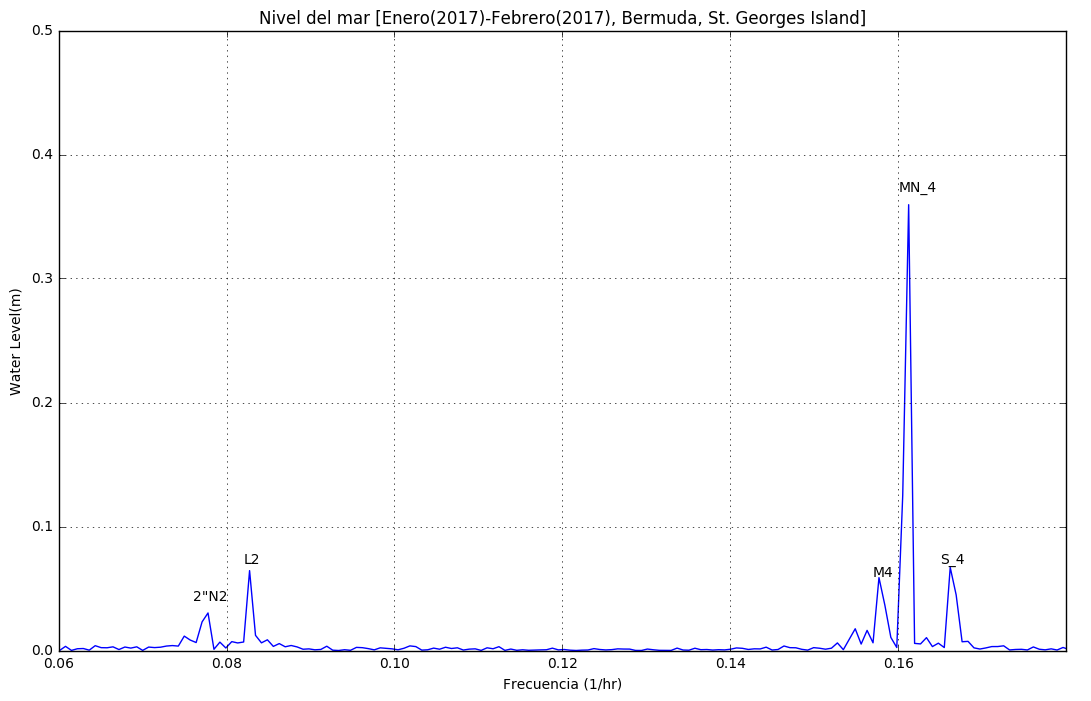

In [45]:
#APLICAR LA TRANSFORMADA A LOS DATOS DE LA TABLA ANTERIOR

#Importar lo necesario para cumplir el objetivo
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import rfft

#Tamaño de la imagen
fig = plt.gcf()
fig.set_size_inches(13, 8)

# Numero de datos
N = 1416
# Periodo
T = 1.0
x = df_union[u'Hora']
y = df_union[u'WaterLevel']
yf = rfft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.xlim(0.06,0.18)
plt.ylim(0,0.5)
mplt.ylabel('Water Level(m)')
mplt.xlabel('Frecuencia (1/hr)')
mplt.title('Nivel del mar [Enero(2017)-Febrero(2017), Bermuda, St. Georges Island]')
plt.grid() 

#Identificando picos significativos
plt.text(0.076,0.04,'2"N2')
#13.16
plt.text(0.082,0.07,'L2')
#12.1951
plt.text(0.157,0.06,'M4')
#6.3694
plt.text(0.160,0.37,'MN_4')
#6.25
plt.text(0.165,0.07,'S_4')
#6.06
#Mostrar gráfico
plt.show()

In [42]:
df.describe()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,WaterLevel,Sigma,O,F,R,L,Quality
count,2160.000000,2160.000000,2160.000000,2160.0,0.0,0.0,0.0
mean,0.422575,0.037181,0.007870,0.0,NaN,NaN,NaN
std,0.297827,0.032130,0.088386,0.0,NaN,NaN,NaN
min,-0.215000,0.000000,0.000000,0.0,NaN,NaN,NaN
25%,0.178000,0.017000,0.000000,0.0,NaN,NaN,NaN
50%,0.421500,0.025000,0.000000,0.0,NaN,NaN,NaN
75%,0.676250,0.045000,0.000000,0.0,NaN,NaN,NaN
max,1.093000,0.230000,1.000000,0.0,NaN,NaN,NaN


In [44]:
#Exportar archivo modificado para realizar la actividad 07.
df_union.to_csv('Act_7_bermudas.csv',index=False)